<a href="https://colab.research.google.com/github/ShreyasK-05/image_processing/blob/main/IPA_assignment_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📘 Image Processing and Analysis Assignment  
**Student Name:**   Shreyas K, Shriram Gopalakrishnan
**Course:** UCS2523 – Image Processing and Analysis  
**Objective:** Implement and evaluate a complete digital image processing pipeline.


In [ ]:

!pip install scikit-image opencv-python matplotlib numpy

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import os

os.makedirs("outputs", exist_ok=True)



## Task 1 – Image Acquisition  
Load the chosen real-world image, justify the scene, and prepare it for processing.


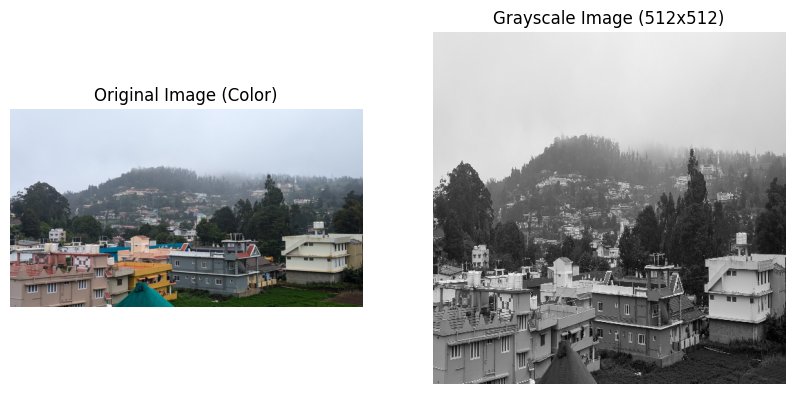

In [ ]:

from google.colab import files
uploaded = files.upload()

image = cv2.imread("IPA-image.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_resized = cv2.resize(gray, (512, 512))
cv2.imwrite("outputs/original_gray.png", gray_resized)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(image_rgb); plt.title("Original Image (Color)"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(gray_resized, cmap='gray'); plt.title("Grayscale Image (512x512)"); plt.axis("off")
plt.show()



## Task 2 – Noise Simulation  
Add Gaussian and Salt & Pepper noise to evaluate different degradation patterns.


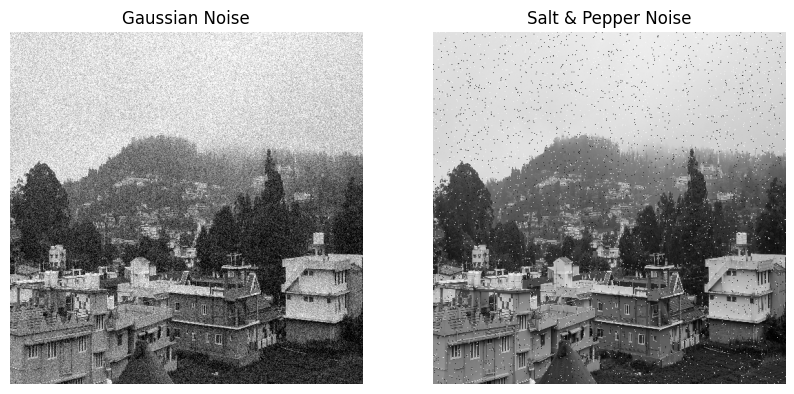

In [ ]:

gaussian_noisy = random_noise(gray_resized, mode='gaussian', var=0.01)
sp_noisy = random_noise(gray_resized, mode='s&p', amount=0.02)

gaussian_noisy = (gaussian_noisy * 255).astype(np.uint8)
sp_noisy = (sp_noisy * 255).astype(np.uint8)

cv2.imwrite("outputs/gaussian_noisy.png", gaussian_noisy)
cv2.imwrite("outputs/salt_pepper_noisy.png", sp_noisy)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(gaussian_noisy, cmap='gray'); plt.title("Gaussian Noise"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(sp_noisy, cmap='gray'); plt.title("Salt & Pepper Noise"); plt.axis("off")
plt.show()



## Task 3 – Preprocessing and Enhancement  
Convert to grayscale, resize, and apply histogram equalization and contrast stretching.


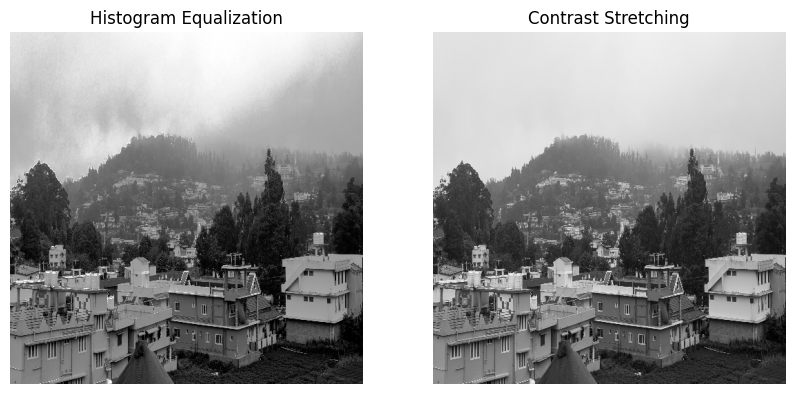

In [ ]:

equalized = cv2.equalizeHist(gray_resized)
contrast_stretched = cv2.normalize(gray_resized, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

cv2.imwrite("outputs/histogram_equalized.png", equalized)
cv2.imwrite("outputs/contrast_stretched.png", contrast_stretched)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(equalized, cmap='gray'); plt.title("Histogram Equalization"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(contrast_stretched, cmap='gray'); plt.title("Contrast Stretching"); plt.axis("off")
plt.show()



## Task 4 – Noise Filtering and Denoising  
Compare Median and Gaussian filters qualitatively and quantitatively using PSNR/SSIM.


Median Filter - PSNR: 25.55 SSIM: 0.816
Gaussian Filter - PSNR: 24.9 SSIM: 0.579


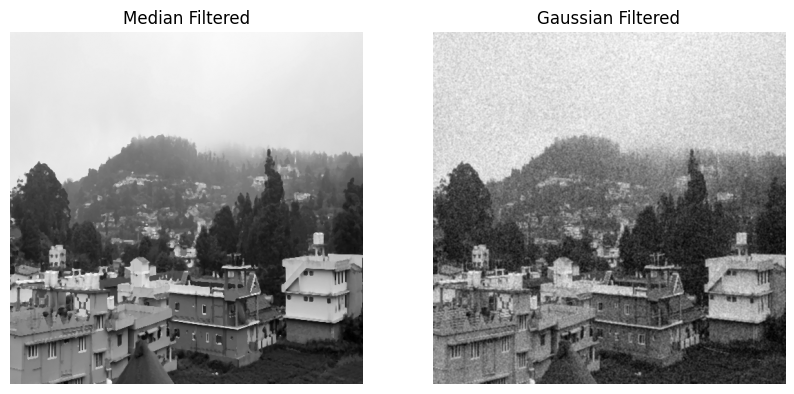

In [ ]:

median_filtered = cv2.medianBlur(sp_noisy, 3)
gaussian_filtered = cv2.GaussianBlur(gaussian_noisy, (3,3), 0)

cv2.imwrite("outputs/median_filtered.png", median_filtered)
cv2.imwrite("outputs/gaussian_filtered.png", gaussian_filtered)

psnr_median = peak_signal_noise_ratio(gray_resized, median_filtered)
psnr_gaussian = peak_signal_noise_ratio(gray_resized, gaussian_filtered)
ssim_median = structural_similarity(gray_resized, median_filtered)
ssim_gaussian = structural_similarity(gray_resized, gaussian_filtered)

print("Median Filter - PSNR:", round(psnr_median,2), "SSIM:", round(ssim_median,3))
print("Gaussian Filter - PSNR:", round(psnr_gaussian,2), "SSIM:", round(ssim_gaussian,3))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(median_filtered, cmap='gray'); plt.title("Median Filtered"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(gaussian_filtered, cmap='gray'); plt.title("Gaussian Filtered"); plt.axis("off")
plt.show()



## Task 5 – Segmentation and Object Isolation  
Apply Otsu thresholding and Canny edge detection to isolate image objects.


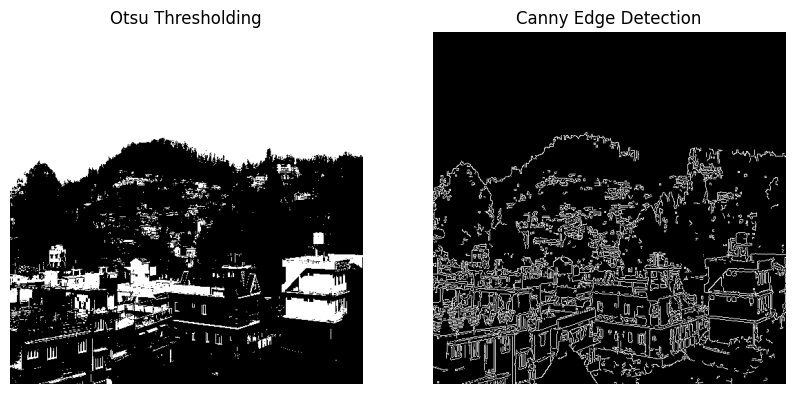

In [ ]:

_, otsu_thresh = cv2.threshold(gray_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite("outputs/otsu_threshold.png", otsu_thresh)

edges = cv2.Canny(gray_resized, 100, 200)
cv2.imwrite("outputs/canny_edges.png", edges)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(otsu_thresh, cmap='gray'); plt.title("Otsu Thresholding"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(edges, cmap='gray'); plt.title("Canny Edge Detection"); plt.axis("off")
plt.show()



## Task 6 – Feature Evaluation  
Extract features like area and centroid from segmented regions.


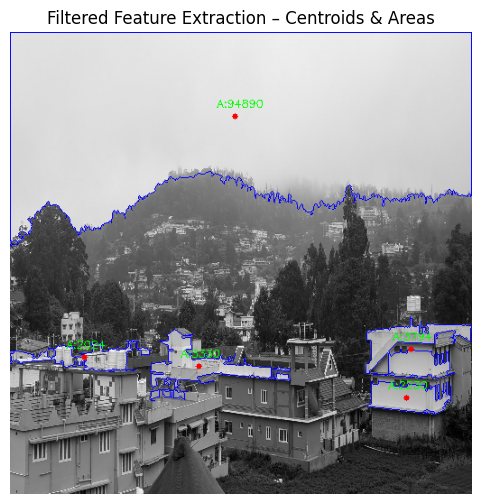

In [ ]:

contours, _ = cv2.findContours(otsu_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
feature_img = cv2.cvtColor(gray_resized, cv2.COLOR_GRAY2BGR)

for c in contours:
    area = cv2.contourArea(c)
    if area < 500:
        continue
    M = cv2.moments(c)
    if M["m00"] != 0:
        cX = int(M["m10"]/M["m00"])
        cY = int(M["m01"]/M["m00"])
        cv2.drawContours(feature_img, [c], -1, (255,0,0), 1)
        cv2.circle(feature_img, (cX, cY), 3, (0,0,255), -1)
        cv2.putText(feature_img, f"A:{int(area)}", (cX-20, cY-10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 1)
cv2.imwrite("outputs/feature_eval.png", feature_img)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(feature_img, cv2.COLOR_BGR2RGB))
plt.title("Filtered Feature Extraction – Centroids & Areas")
plt.axis("off")
plt.show()



## Task 7 – Visualization and Reflection  
Display the full pipeline results and reflect on system performance.


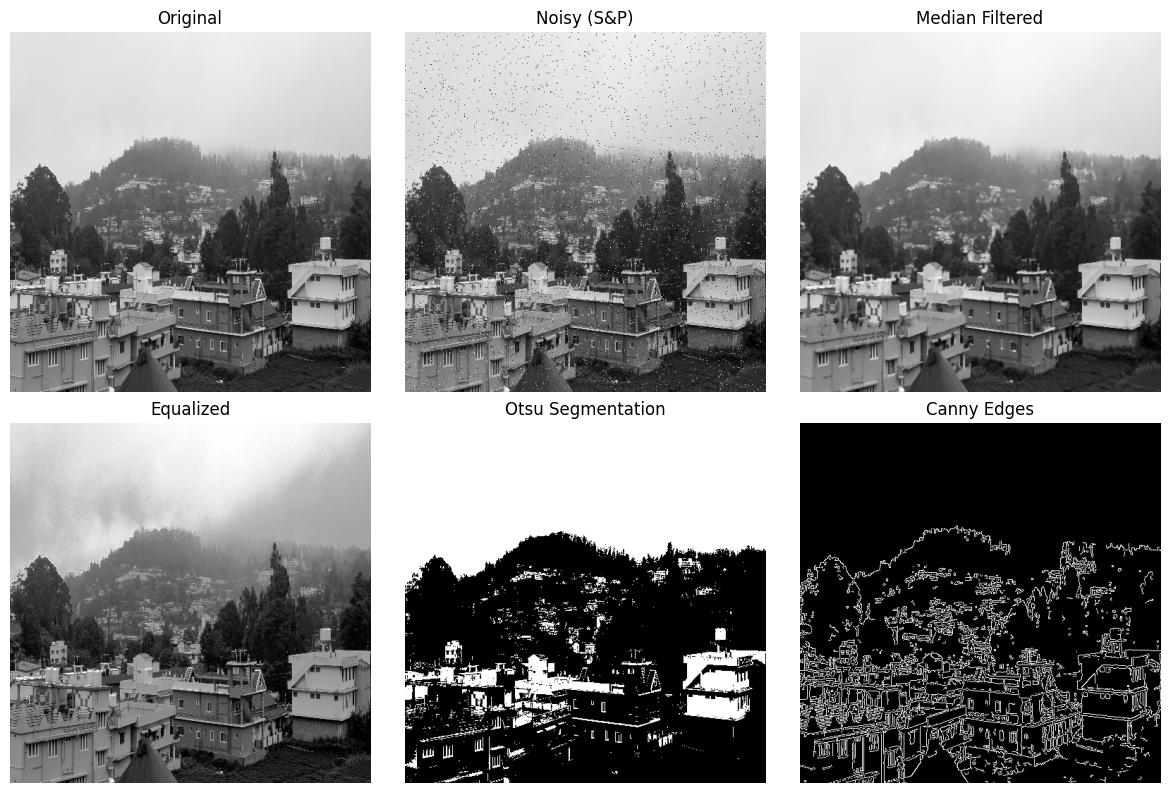


Pipeline Reflection:
- Image acquisition provided clear object visibility and contrast.
- Gaussian and salt-pepper noise introduced distinct degradation types.
- Median filtering performed better on impulsive (S&P) noise; Gaussian blur suited Gaussian noise.
- Otsu segmentation effectively separated regions by intensity; Canny edges highlighted structural boundaries.
- Overall, preprocessing and filtering improved clarity, enabling reliable segmentation and feature detection.


In [ ]:

fig, axs = plt.subplots(2, 3, figsize=(12,8))
axs[0,0].imshow(gray_resized, cmap='gray'); axs[0,0].set_title("Original")
axs[0,1].imshow(sp_noisy, cmap='gray'); axs[0,1].set_title("Noisy (S&P)")
axs[0,2].imshow(median_filtered, cmap='gray'); axs[0,2].set_title("Median Filtered")
axs[1,0].imshow(equalized, cmap='gray'); axs[1,0].set_title("Equalized")
axs[1,1].imshow(otsu_thresh, cmap='gray'); axs[1,1].set_title("Otsu Segmentation")
axs[1,2].imshow(edges, cmap='gray'); axs[1,2].set_title("Canny Edges")
for ax in axs.ravel():
    ax.axis("off")
plt.tight_layout()
plt.savefig("outputs/final_pipeline_summary.png")
plt.show()

print("\nPipeline Reflection:")
print("- Image acquisition provided clear object visibility and contrast.")
print("- Gaussian and salt-pepper noise introduced distinct degradation types.")
print("- Median filtering performed better on impulsive (S&P) noise; Gaussian blur suited Gaussian noise.")
print("- Otsu segmentation effectively separated regions by intensity; Canny edges highlighted structural boundaries.")
print("- Overall, preprocessing and filtering improved clarity, enabling reliable segmentation and feature detection.")



## Conclusion  
This notebook demonstrated a complete digital image processing system, covering acquisition, noise modeling, preprocessing, filtering, segmentation, and analysis. The results highlight the effectiveness of classical spatial-domain techniques for enhancing and interpreting real-world images. Future work can explore frequency-domain filtering or deep learning-based segmentation for comparison.


In [ ]:
!zip -r outputs.zip outputs

  adding: outputs/ (stored 0%)
  adding: outputs/salt_pepper_noisy.png (deflated 0%)
  adding: outputs/contrast_stretched.png (deflated 1%)
  adding: outputs/feature_eval.png (deflated 14%)
  adding: outputs/gaussian_filtered.png (deflated 0%)
  adding: outputs/original_gray.png (deflated 1%)
  adding: outputs/canny_edges.png (deflated 15%)
  adding: outputs/median_filtered.png (deflated 0%)
  adding: outputs/histogram_equalized.png (deflated 1%)
  adding: outputs/final_pipeline_summary.png (deflated 6%)
  adding: outputs/.ipynb_checkpoints/ (stored 0%)
  adding: outputs/otsu_threshold.png (deflated 14%)
  adding: outputs/gaussian_noisy.png (deflated 0%)
